# Cryptocurrency Trading 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Crypto Intro
# Trading spiel for crypto
# API spiel

In [9]:
import pandas as pd
import requests

In [3]:
resp = requests.get('https://min-api.cryptocompare.com/data/top/totalvol?limit=20&tsym=USD')
top_coins = [r['CoinInfo']['Name'] for r in resp.json()['Data']]

In [18]:
def get_price_data(coin_name, cross='USD', freq='hour', limit=1000):
    url = f'https://min-api.cryptocompare.com/data/histo{freq}?fsym={coin_name}&tsym={cross}&limit={limit}'
    print(url)
    resp = requests.get(url)
    return pd.DataFrame(resp.json()['Data']).assign(coin=coin_name)

btc = get_price_data('BTC')
btc.head()

https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=1000


,close,high,low,open,time,volumefrom,volumeto,coin
0,7412.65,7446.48,7405.24,7434.81,1528203600,2388.34,17784923.12,BTC
1,7430.11,7444.23,7408.87,7414.37,1528207200,1596.87,11895641.63,BTC
2,7576.65,7580.19,7423.12,7430.11,1528210800,5535.95,41573514.92,BTC
3,7585.10,7611.34,7560.76,7577.09,1528214400,4354.60,33071264.43,BTC
4,7628.64,7672.70,7576.92,7585.40,1528218000,5375.14,41039801.00,BTC


In [5]:
raw = pd.concat([get_price_data(coin, limit=100) for coin in top_coins])

https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=100
https://min-api.cryptocompare.com/data/histohour?fsym=ETH&tsym=USD&limit=100
https://min-api.cryptocompare.com/data/histohour?fsym=EOS&tsym=USD&limit=100
https://min-api.cryptocompare.com/data/histohour?fsym=BCH&tsym=USD&limit=100
https://min-api.cryptocompare.com/data/histohour?fsym=LTC&tsym=USD&limit=100
https://min-api.cryptocompare.com/data/histohour?fsym=ETC&tsym=USD&limit=100
https://min-api.cryptocompare.com/data/histohour?fsym=XRP&tsym=USD&limit=100
https://min-api.cryptocompare.com/data/histohour?fsym=CET&tsym=USD&limit=100
https://min-api.cryptocompare.com/data/histohour?fsym=TRX&tsym=USD&limit=100
https://min-api.cryptocompare.com/data/histohour?fsym=QTUM&tsym=USD&limit=100
https://min-api.cryptocompare.com/data/histohour?fsym=ADA&tsym=USD&limit=100
https://min-api.cryptocompare.com/data/histohour?fsym=NEO&tsym=USD&limit=100
https://min-api.cryptocompare.com/data/histohour?fsym=DASH&tsym=USD&limit=1

In [12]:
raw.head()

coin,ADA,BCH,BNB,BTC,BTM*,CET,DASH,EOS,ETC,ETH,GTO,IOT,LTC,NEO,ONT,PAY,QTUM,TRX,XRP,ZEC
time,,,,,,,,,,,,,,,,,,,,
1531443600,0.1281,699.87,12.24,6234.36,0.2998,0.08329,214.76,7.09,16.61,433.13,0.1437,0.9715,77.22,32.36,3.40,0.6272,7.57,0.03294,0.4395,154.50
1531447200,0.1283,703.49,12.27,6244.85,0.3040,0.08331,216.93,7.16,16.68,435.04,0.1428,0.9793,77.42,32.37,3.41,0.6260,7.64,0.03301,0.4403,154.56
1531450800,0.1286,701.58,12.34,6252.59,0.3033,0.08397,240.85,7.18,16.70,438.13,0.1448,0.9909,77.78,32.57,3.49,0.6344,7.64,0.03317,0.4430,155.86
1531454400,0.1285,697.88,12.33,6257.74,0.3047,0.08592,231.01,7.10,16.64,435.87,0.1455,0.9840,77.52,33.15,3.58,0.6281,7.64,0.03273,0.4437,156.04
1531458000,0.1292,698.86,12.44,6256.03,0.3028,0.08627,228.39,7.15,16.63,436.66,0.1464,0.9947,77.47,33.19,3.60,0.6620,7.64,0.03298,0.4447,156.06


In [10]:
prices = raw.set_index(['coin', 'time'])['close'].unstack(level='coin')

In [13]:
correlations = prices.corr()

In [ ]:
# Interactive plotting in Jupter like matlab

In [15]:
import seaborn as sns

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "4pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

(
    correlations
    .style
    .background_gradient(cmap, axis=1)\
    .set_properties(**{'font-size': '10pt', 'width': '20'})\
    .set_caption("Crypocurrency Correlations")\
    .set_precision(2)\
    .set_table_styles(magnify())
)

coin,ADA,BCH,BNB,BTC,BTM*,CET,DASH,EOS,ETC,ETH,GTO,IOT,LTC,NEO,ONT,PAY,QTUM,TRX,XRP,ZEC
coin,,,,,,,,,,,,,,,,,,,,
ADA,1,0.91,0.79,0.91,0.79,0.68,0.8,0.85,0.77,0.9,0.92,0.86,0.85,0.83,0.65,0.83,0.87,0.91,0.86,0.91
BCH,0.91,1,0.93,0.99,0.95,0.54,0.94,0.98,0.94,0.99,0.93,0.98,0.98,0.97,0.85,0.89,0.98,0.98,0.98,0.72
BNB,0.79,0.93,1,0.93,0.94,0.34,0.89,0.94,0.94,0.95,0.84,0.95,0.95,0.94,0.88,0.84,0.93,0.91,0.93,0.53
BTC,0.91,0.99,0.93,1,0.95,0.54,0.94,0.97,0.94,0.99,0.94,0.98,0.98,0.97,0.85,0.91,0.98,0.98,0.99,0.71
BTM*,0.79,0.95,0.94,0.95,1,0.41,0.93,0.97,0.98,0.97,0.87,0.96,0.96,0.94,0.94,0.79,0.96,0.93,0.95,0.52
CET,0.68,0.54,0.34,0.54,0.41,1,0.45,0.45,0.38,0.51,0.65,0.49,0.44,0.38,0.26,0.48,0.46,0.54,0.45,0.73
DASH,0.8,0.94,0.89,0.94,0.93,0.45,1,0.95,0.93,0.94,0.87,0.95,0.94,0.93,0.89,0.82,0.93,0.92,0.95,0.57
EOS,0.85,0.98,0.94,0.97,0.97,0.45,0.95,1,0.97,0.99,0.9,0.98,0.98,0.96,0.89,0.84,0.98,0.96,0.97,0.61
ETC,0.77,0.94,0.94,0.94,0.98,0.38,0.93,0.97,1,0.95,0.83,0.95,0.96,0.94,0.94,0.77,0.95,0.93,0.94,0.49


In [16]:
eos = get_price_data('EOS')
bch = get_price_data('BCH')

https://min-api.cryptocompare.com/data/histohour?fsym=EOS&tsym=USD&limit=1000
https://min-api.cryptocompare.com/data/histohour?fsym=BCH&tsym=USD&limit=1000


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X=eos[['close']].values
y=bch['close'].values

model = LinearRegression()

In [21]:
model.fit(X=X, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
'Model score: {0:0.2f}'.format(model.score(X, y))

'Model score: 0.96'

Text(0.5,1,'BCH Predicted')

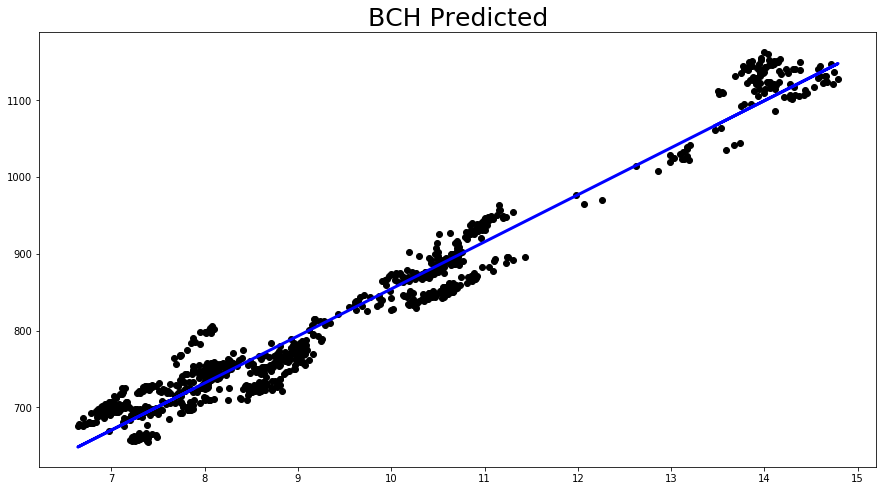

In [23]:
bch_pred = model.predict(X)

fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(X, y,  color='black')
plt.plot(X, bch_pred, color='blue', linewidth=3)
ax.set_title('BCH Predicted', fontdict={'size': 25})

In [19]:
from websocket import create_connection
import datetime
import json

# test_key = '46409838-61C2-493E-873E-ADDBCDABADA3'
test_key = 'DD0864B8-4A5C-42D0-BB42-9A1D9AF50E16'

class CoinAPIv1_subscribe(object):
    def __init__(self, apikey):
        self.type = "hello"
        self.apikey = apikey
        self.heartbeat = True
        self.subscribe_data_type = ["trade"]
        self.subscribe_filter_asset_id = ["BCH", "EOS"]
        self.subscribe_filter_symbol_id = ['BITFINEX_', 'BINANCE_']
        
ws = create_connection("wss://ws.coinapi.io/v1")
sub = CoinAPIv1_subscribe(test_key);

ws.send(json.dumps(sub.__dict__))

230

In [20]:
import json

def get_live_price_updates():
    messages = [json.loads(ws.recv()) for _ in range(30)]
    data = pd.DataFrame(messages)
    data = data[data['type'] != 'hearbeat']
    data = data.join(
        data.symbol_id.str.split('_', expand=True).rename({0: 'Source', 1: 'Kind', 2: 'Coin', 3: 'Base'}, axis=1)
    )
    return data

prices = get_live_price_updates()

ws.close()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [10]:
data = pd.DataFrame(messages)

In [16]:
data = data.join(
    data.symbol_id.str.split('_', expand=True).rename({0: 'Source', 1: 'Kind', 2: 'Coin', 3: 'Base'}, axis=1)
)

In [17]:
data

,price,sequence,size,symbol_id,taker_side,time_coinapi,time_exchange,type,uuid,Source,Kind,Coin,Base
1,7.857600,354478.0,12.880000,BINANCE_SPOT_EOS_USDT,BUY,2018-07-17T05:59:42.9937100Z,2018-07-17T05:59:42.9120000Z,trade,1eeace57-a2cb-41cf-b49b-2b0c95f270be,BINANCE,SPOT,EOS,USDT
2,7.857600,354479.0,132.870000,BINANCE_SPOT_EOS_USDT,BUY,2018-07-17T05:59:42.9937100Z,2018-07-17T05:59:42.9120000Z,trade,fcd62a19-621d-41a9-ac70-f5eef6b2af6b,BINANCE,SPOT,EOS,USDT
3,7.857600,354480.0,17.130000,BINANCE_SPOT_EOS_USDT,BUY,2018-07-17T05:59:43.0093312Z,2018-07-17T05:59:42.9300000Z,trade,b80bef5f-86f1-41f6-9f19-68b63f5baab4,BINANCE,SPOT,EOS,USDT
4,7.857600,354481.0,102.000000,BINANCE_SPOT_EOS_USDT,BUY,2018-07-17T05:59:43.0249506Z,2018-07-17T05:59:42.9300000Z,trade,2e8f2e49-5c5e-43b3-a0ec-9eef213dc532,BINANCE,SPOT,EOS,USDT
5,7.867900,267803.0,8.000000,BITFINEX_SPOT_EOS_USD,BUY,2018-07-17T05:59:43.1735731Z,2018-07-17T05:59:43.0000000Z,trade,f15e7209-9ce6-45a8-bfa8-70f247df67df,BITFINEX,SPOT,EOS,USD
6,7.868000,267804.0,2.000000,BITFINEX_SPOT_EOS_USD,BUY,2018-07-17T05:59:43.1892863Z,2018-07-17T05:59:43.0000000Z,trade,6363a30a-6e0c-4241-87cb-61bf5ae2c9e9,BITFINEX,SPOT,EOS,USD
7,789.010000,89066.0,0.237458,BITFINEX_SPOT_BCH_USD,BUY,2018-07-17T05:59:43.7985992Z,2018-07-17T05:59:43.0000000Z,trade,a61fc71f-047e-4ba0-a1d5-e7fdd275a356,BITFINEX,SPOT,BCH,USD
11,0.001176,318080.0,64.730000,BINANCE_SPOT_EOS_BTC,BUY,2018-07-17T05:59:46.8869302Z,2018-07-17T05:59:46.7760000Z,trade,db764801-7afd-4678-9bda-248a7a966ed8,BINANCE,SPOT,EOS,BTC
12,0.001177,318081.0,125.480000,BINANCE_SPOT_EOS_BTC,BUY,2018-07-17T05:59:46.8869302Z,2018-07-17T05:59:46.7960000Z,trade,f8ea7d1a-399b-47a6-a4af-8877b8d9d772,BINANCE,SPOT,EOS,BTC
13,0.001177,318082.0,52.640000,BINANCE_SPOT_EOS_BTC,BUY,2018-07-17T05:59:46.9161162Z,2018-07-17T05:59:46.8140000Z,trade,db573d99-82ea-426e-8f78-0c77549400c6,BINANCE,SPOT,EOS,BTC


In [ ]:


def make_document(doc):
    def update():
        data = transform(get_latest_orders()
        source.data = {c: data[c].values for c in data.columns}

        if data.empty:
            return

        update_time = pd.Timestamp(data.iloc[0]['time']).to_pydatetime().replace(tzinfo=None)
        update_age = datetime.timedelta(seconds=int((datetime.datetime.utcnow() - update_time).total_seconds()))

        fig.title.text = f"Live Goku Orders - Updated {update_time.strftime('%Y-%m-%d %H:%M:%S')} " \
                         f"({update_age})"

    doc.add_periodic_callback(update, 1000)

In [4]:
from bokeh.io import output_notebook

In [8]:
from bokeh.io import output_notebook
from bokeh.layouts import layout
from bokeh.models import HoverTool, RangeSlider, CheckboxButtonGroup, RadioButtonGroup
from bokeh.plotting import figure, ColumnDataSource

source = ColumnDataSource()

fig = figure(
    tools=['hover', 'pan', 'box_zoom', 'wheel_zoom', 'reset'],
    plot_width=1000,
    plot_height=500,
)

fig.title.text = 'Plot'

p = fig.triangle(
    source=source,
    x='x_axis',
    y='y_axis',
    color=None,
    fill_color='colour',
    size='triangle_size',
    alpha="triangle_alpha",
    angle='triangle_angle',
    legend='strat',
)

NameError: name 'source' is not defined